In [48]:
import pandas as pd

events = pd.read_csv(r"C:\Temp\data\systemevents_20171114.csv", index_col=None, usecols=[1,2,3])
events['Datum und Uhrzeit'] = pd.to_datetime(events['Datum und Uhrzeit'])
events = events.set_index(pd.DatetimeIndex(events['Datum und Uhrzeit']))
events.head()

,Datum und Uhrzeit,Quelle,Ereignis-ID
Datum und Uhrzeit,,,
2017-11-14 17:43:17,2017-11-14 17:43:17,Microsoft-Windows-DNS-Client,1014
2017-11-14 17:43:08,2017-11-14 17:43:08,Microsoft-Windows-Power-Troubleshooter,1
2017-11-14 17:43:06,2017-11-14 17:43:06,BTHUSB,34
2017-11-14 17:43:06,2017-11-14 17:43:06,BTHUSB,18
2017-11-14 17:43:06,2017-11-14 17:43:06,e1cexpress,27


In [49]:
events.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1774 entries, 2017-11-14 17:43:17 to 2017-01-11 22:23:54
Data columns (total 3 columns):
Datum und Uhrzeit    1774 non-null datetime64[ns]
Quelle               1774 non-null object
Ereignis-ID          1774 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 55.4+ KB


In [50]:
start_stop_events = events[
    (events['Ereignis-ID'] == 42)
    |
    (events['Quelle'] == "Microsoft-Windows-Power-Troubleshooter")
].copy()
start_stop_events = start_stop_events[['Ereignis-ID']]
start_stop_events.head()

,Ereignis-ID
Datum und Uhrzeit,
2017-11-14 17:43:08,1
2017-11-14 07:39:43,42
2017-11-14 07:29:45,1
2017-11-14 07:23:26,42
2017-11-14 07:03:55,1


In [51]:
start_stop_events.ix[start_stop_events['Ereignis-ID'] == 1, 'state'] = 1
start_stop_events.ix[start_stop_events['Ereignis-ID'] == 42, 'state'] = 0
start_stop_events.head()

C:\dev\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,Ereignis-ID,state
Datum und Uhrzeit,,
2017-11-14 17:43:08,1,1.0
2017-11-14 07:39:43,42,0.0
2017-11-14 07:29:45,1,1.0
2017-11-14 07:23:26,42,0.0
2017-11-14 07:03:55,1,1.0


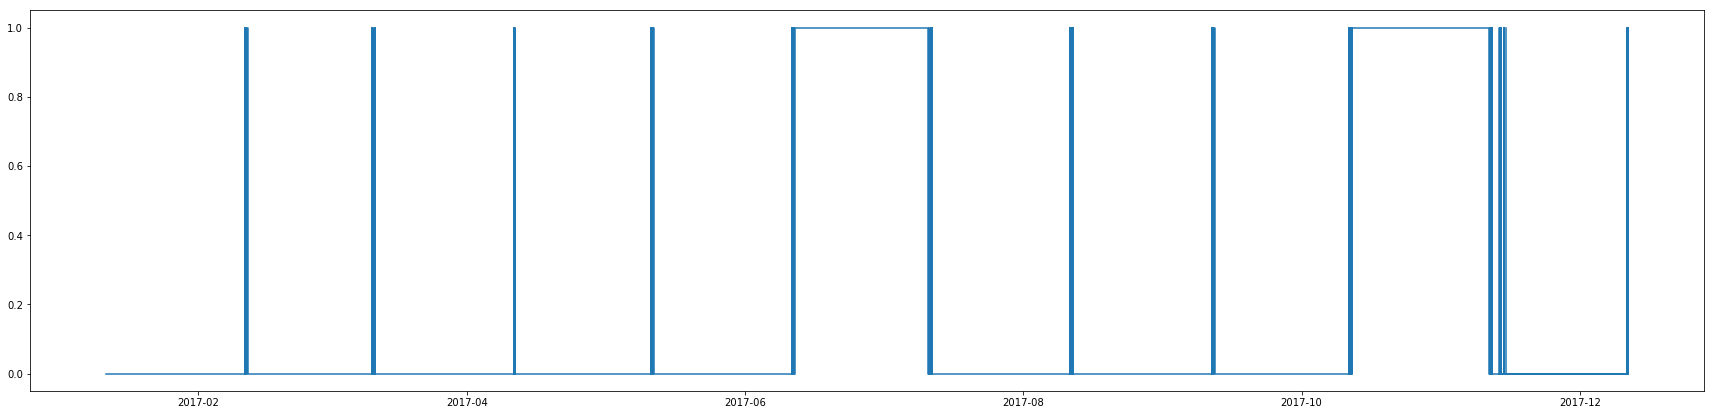

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
plt.step(start_stop_events.index, start_stop_events['state'], where='pre')
